In [1]:
import os
import sys

def is_colab():
    return 'google.colab' in sys.modules

if is_colab():
    from google.colab import drive
    drive.mount('/content/drive')
    PROJECT_PATH = '/content/drive/MyDrive/NBS_project/'
else:
    # 自动根据当前脚本定位项目根路径
    PROJECT_PATH = os.path.abspath(os.path.join(os.path.dirname(__file__), '..')) \
        if '__file__' in globals() else os.getcwd()

if PROJECT_PATH not in sys.path:
    sys.path.append(PROJECT_PATH)

print(f"项目路径设置为: {PROJECT_PATH}")

from src.config import Config
from src.main import create_MDs,create_ESP
import src.baseline as baseline
import src.NBS as NBS
import src.model as model
import numpy as np
import matplotlib.pyplot as plt


项目路径设置为: c:\Users\a1831\Desktop\NBS_project


In [2]:
CONFIG_PATH = os.path.join(PROJECT_PATH, "configs", "test.json")
config = Config(CONFIG_PATH)

In [3]:
# Experiment 1: Performance of Proposed Algorithm

# num_mds = [10, 20, 30, 40, 50]
lambda0 = [50, 100, 150, 200, 250]
sw_uni, sw_pro, sw_non, sw_con, sw_swm, sw_admm = [],[],[],[],[],[]
Dm_uni, Dm_pro, Dm_non, Dm_con, Dm_swm, Dm_admm = [],[],[],[],[],[]
baselines = ['Uni', 'Pro', 'Non', 'Con', 'Opt', 'ADMM']
for l0 in lambda0:
  config.params["lambda0"] = l0
  print(f"=====Lambda 0: {l0}=====")

  seed = 41
  MDs = create_MDs(config, seed=seed)
  esp = create_ESP(config, seed=seed)
  # np.random.shuffle(MDs)  # Shuffle the MDs
  # for md in MDs[:n]:
  #   print(md.param)
  # print(esp.param)

  print("=====Uniform Baseline=====")
  T = 100
  N = len(MDs)
  lam_uni, p_uni, r_uni, Dmax_uni = np.zeros(N),np.zeros(N),np.zeros(N),0
  for _ in range(T):
      l,p,r,d = baseline.uniform_baseline(esp, MDs,43)
      lam_uni += l
      p_uni += p
      r_uni += r
      Dmax_uni += d
  lam_uni, p_uni, r_uni, Dmax_uni = lam_uni/T, p_uni/T, r_uni/T, Dmax_uni/T

  print("=====Proportional Baseline=====")
  lam_pro, p_pro, r_pro, Dmax_pro = np.zeros(N),np.zeros(N),np.zeros(N),0
  for _ in range(T):
      l,p,r,d = baseline.proportional_baseline(esp,MDs,43)
      lam_pro += l
      p_pro += p
      r_pro += r
      Dmax_pro += d
  lam_pro, p_pro, r_pro, Dmax_pro = lam_pro/T, p_pro/T, r_pro/T, Dmax_pro/T

  print("======Non-Cooperative======")
  lam_non, p_non, r_non, Dmax_non = baseline.non_cooperative_baseline(esp,MDs)
  print("=====Contract=====")
  lam_con, p_con, r_con, Dmax_con = baseline.contract_baseline(esp,MDs)
  print("======SWM=====")
  lam_swm, p_swm, Dmax_swm = baseline.social_welfare_maximization(esp, MDs)
  print("=====ADMM=====")
  lamb_admm, p_admm, Dmax_admm = NBS.ADMM(esp, MDs)
  r_admm = NBS.negotiation(esp, MDs,lamb_admm, p_admm, Dmax_admm)

  sw_uni.append(model.social_welfare(esp, MDs, lam_uni, p_uni))
  sw_pro.append(model.social_welfare(esp, MDs, lam_pro, p_pro))
  sw_non.append(model.social_welfare(esp, MDs, lam_non, p_non))
  sw_con.append(model.social_welfare(esp, MDs, lam_con, p_con))
  sw_swm.append(model.social_welfare(esp, MDs, lam_swm, p_swm))
  sw_admm.append(model.social_welfare(esp, MDs, lamb_admm, p_admm))
  Dm_uni.append(Dmax_uni)
  Dm_pro.append(Dmax_pro)
  Dm_non.append(Dmax_non)
  Dm_con.append(Dmax_con)
  Dm_swm.append(Dmax_swm)
  Dm_admm.append(Dmax_admm)
  print("===================")
sw = [sw_uni, sw_pro, sw_non, sw_con, sw_swm, sw_admm]
Dm = [Dm_uni, Dm_pro, Dm_non, Dm_con, Dm_swm, Dm_admm]


=====Lambda 0: 50=====
=====Uniform Baseline=====
=====Proportional Baseline=====
======Non-Cooperative======
=====Contract=====


c:\Users\a1831\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\optimize\_differentiable_functions.py:376: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)
c:\Users\a1831\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\optimize\_differentiable_functions.py:728: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


======SWM=====
=====ADMM=====
=====Lambda 0: 100=====
=====Uniform Baseline=====
=====Proportional Baseline=====
======Non-Cooperative======
=====Contract=====
======SWM=====
=====ADMM=====
=====Lambda 0: 150=====
=====Uniform Baseline=====
=====Proportional Baseline=====
======Non-Cooperative======
  NLP failed: Positive directional derivative for linesearch
  NLP failed: Positive directional derivative for linesearch
  NLP failed: Positive directional derivative for linesearch
=====Contract=====
======SWM=====
=====ADMM=====
=====Lambda 0: 200=====
=====Uniform Baseline=====
=====Proportional Baseline=====
======Non-Cooperative======
  NLP failed: Positive directional derivative for linesearch
  NLP failed: Positive directional derivative for linesearch
  NLP failed: Positive directional derivative for linesearch
  NLP failed: Positive directional derivative for linesearch
=====Contract=====
======SWM=====
=====ADMM=====
=====Lambda 0: 250=====
=====Uniform Baseline=====
=====Proport

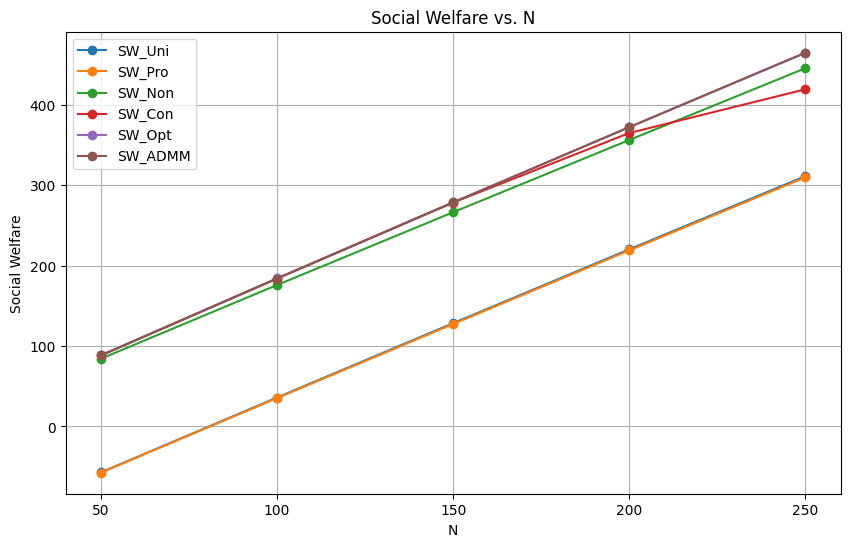

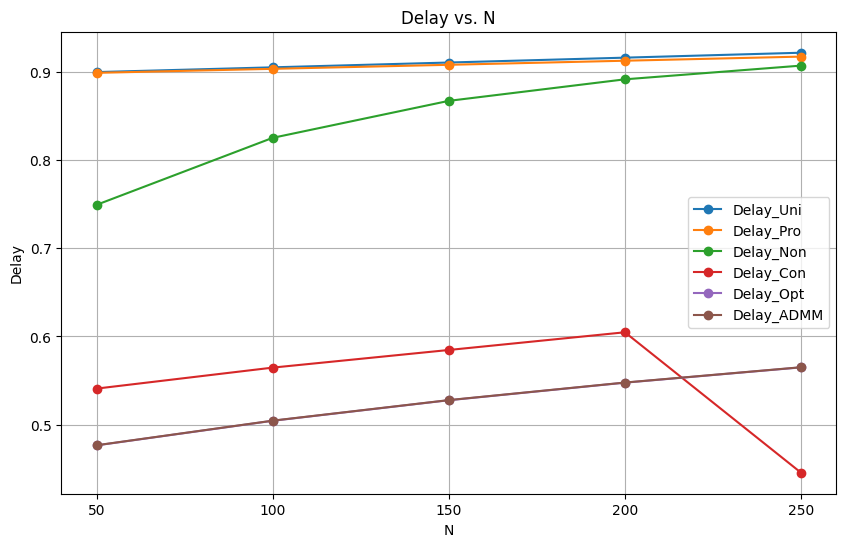

In [4]:
plt.figure(figsize=(10, 6)) # 设置图的大小
for i, data in enumerate(sw):
    plt.plot(lambda0, data, marker='o', label=f'SW_{baselines[i]}')

plt.title('Social Welfare vs. N')
plt.xlabel('N')
plt.ylabel('Social Welfare')
plt.xticks(lambda0) # 确保 N 值在横轴上清晰显示
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6)) # 设置图的大小
for i, data in enumerate(Dm):
    plt.plot(lambda0, data, marker='o', label=f'Delay_{baselines[i]}')

plt.title('Delay vs. N')
plt.xlabel('N')
plt.ylabel('Delay')
plt.xticks(lambda0) # 确保 N 值在横轴上清晰显示
plt.grid(True)
plt.legend()
plt.show()

In [5]:
  # for md in MDs[:n]:
  #   print(md.param)
print(esp.param)

{'lambda0': 70, 'D0': 1, 'theta': 2, 'o': 3, 'omega_0': 2, 's': 0.1, 'l': 0.8}


In [ ]:
# Experiment 2: Comparison of NBS and Non-Cooperative

In [ ]:
# Experiment 3: Impact of Bargaining Power

In [ ]:
# Experiment 4: Impact of Task Workload

In [ ]:
# Experiment 5: Impact of QoS Requirement